# ModelingToolkit: define ODEs with symbolic expressions

You can also define ODE systems symbolically using [ModelingToolkit.jl (MTK)](https://github.com/SciML/ModelingToolkit.jl) and let MTK generate high-performance ODE functions.

- transforming and simplifying expressions for performance
- Jacobian and Hessian generation
- accessing eliminated states (called observed variables)
- building and connecting subsystems programmatically (component-based modeling)

See also [Simulating Big Models in Julia with ModelingToolkit @ JuliaCon 2021 Workshop](https://youtu.be/HEVOgSLBzWA).

## Radioactive decay
Here we use the same example of decaying radioactive elements

In [1]:
using ModelingToolkit
using OrdinaryDiffEq
using Plots

independent variable (time) and dependent variables

In [2]:
@independent_variables t
@variables c(t) RHS(t)

2-element Vector{Symbolics.Num}:
   c(t)
 RHS(t)

parameters: decay rate

In [3]:
@parameters λ

1-element Vector{Symbolics.Num}:
 λ

Differential operator w.r.t. time

In [4]:
D = Differential(t)

Differential(t)

Equations in MTK use the tilde character (`~`) for equality.
Every MTK system requires a name. The `@named` macro simply ensures that the symbolic name matches the name in the REPL.

In [5]:
eqs = [
    RHS ~ -λ * c
    D(c) ~ RHS
]

2-element Vector{Symbolics.Equation}:
 RHS(t) ~ -c(t)*λ
 Differential(t)(c(t)) ~ RHS(t)

Build and ODE system from equations

In [6]:
@mtkbuild sys = ODESystem(eqs, t)

Model sys:
Equations (1):
  1 standard: see equations(sys)
Unknowns (1): see unknowns(sys)
  c(t)
Parameters (1): see parameters(sys)
  λ
Observed (1): see observed(sys)

Setup initial conditions, time span, parameter values, the `ODEProblem`, and solve the problem.

In [7]:
p = [λ => 1.0]
u0 = [c => 1.0]
tspan = (0.0, 2.0)
prob = ODEProblem(sys, u0, tspan, p);
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 8-element Vector{Float64}:
 0.0
 0.10001999200479662
 0.34208427066999536
 0.6553980136343391
 1.0312652525315806
 1.4709405856363595
 1.9659576669700232
 2.0
u: 8-element Vector{Vector{Float64}}:
 [1.0]
 [0.9048193287657775]
 [0.7102883621328676]
 [0.5192354400036404]
 [0.35655576576996556]
 [0.2297097907863828]
 [0.14002247272452764]
 [0.1353360028400881]

Visualize the solution

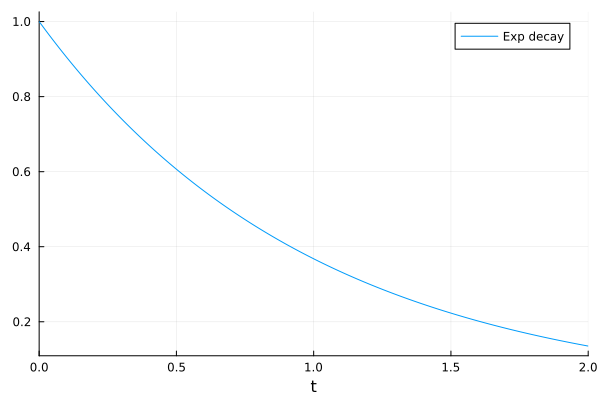

In [8]:
plot(sol, label="Exp decay")

The solution interface provides symbolic access. You can access the results of `c` directly.

In [9]:
sol[c]

8-element Vector{Float64}:
 1.0
 0.9048193287657775
 0.7102883621328676
 0.5192354400036404
 0.35655576576996556
 0.2297097907863828
 0.14002247272452764
 0.1353360028400881

With interpolations with specified time points

In [10]:
sol(0.0:0.1:2.0, idxs=c)

t: 0.0:0.1:2.0
u: 21-element Vector{Float64}:
 1.0
 0.9048374180989603
 0.8187305973051514
 0.7408182261974484
 0.670319782243577
 0.6065302341562359
 0.5488116548085096
 0.49658509875978446
 0.4493280239179766
 0.4065692349272286
 ⋮
 0.30119273799114377
 0.2725309051375336
 0.24659717503493142
 0.22313045099430742
 0.20189530933816474
 0.18268185222253558
 0.16529821250790575
 0.14956912660454402
 0.13533600284008812

The eliminated term (RHS in this example) is still traceable.

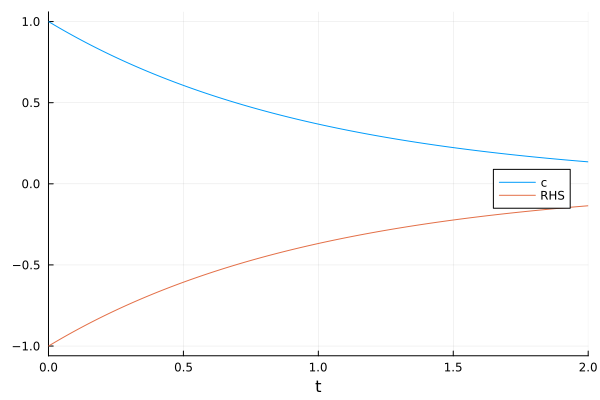

In [11]:
plot(sol, idxs=[c, RHS], legend=:right)

The indexing interface allows symbolic calculations.

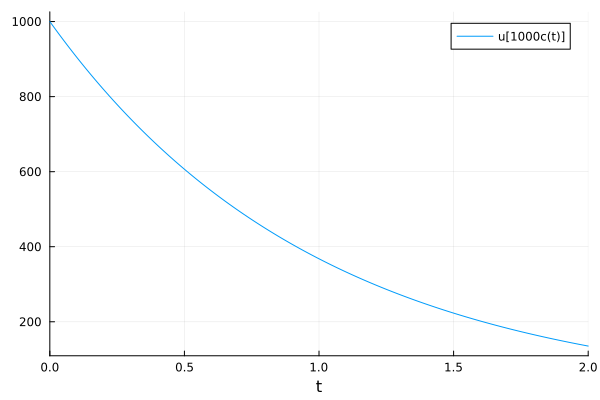

In [12]:
plot(sol, idxs=[c * 1000])

## Lorenz system

Here we setup the initial conditions and parameters with default values.

In [13]:
@independent_variables t
@variables x(t) = 1.0 y(t) = 0.0 z(t) = 0.0
@parameters (σ=10.0, ρ=28.0, β=8 / 3)

D = Differential(t)

eqs = [
    D(x) ~ σ * (y - x)
    D(y) ~ x * (ρ - z) - y
    D(z) ~ x * y - β * z
]

@mtkbuild sys = ODESystem(eqs, t)

Model sys:
Equations (3):
  3 standard: see equations(sys)
Unknowns (3): see unknowns(sys)
  x(t) [defaults to 1.0]
  y(t) [defaults to 0.0]
  z(t) [defaults to 0.0]
Parameters (3): see parameters(sys)
  ρ [defaults to 28.0]
  β [defaults to 2.66667]
  σ [defaults to 10.0]

Here we are using default values, so we pass empty arrays for initial conditions and parameter values.

In [14]:
tspan = (0.0, 100.0)
prob = ODEProblem(sys, [], tspan, []);
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 1292-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.003262408731175873
   0.009058076622686189
   0.01695647090176743
   0.027689960116420883
   0.041856352219618344
   0.060240411865493296
   0.08368541210909924
   ⋮
  99.43545175575305
  99.50217600300971
  99.56297541572351
  99.62622492183432
  99.69561088424294
  99.77387244562912
  99.86354266863755
  99.93826978918452
 100.0
u: 1292-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591548287857, 0.0897706331002921, 0.00014380191884671585]
 [0.9242043547708632, 0.24228915014052968, 0.0010461625485930237]
 [0.8800455783133068, 0.43873649717821195, 0.003424260078582332]
 [0.8483309823046307, 0.6915629680633586, 0.008487625469885364]
 [0.8495036699348377, 1.0145426764822272, 0.01821209108471829]
 [0.91

Phase plot w.r.t symbols.

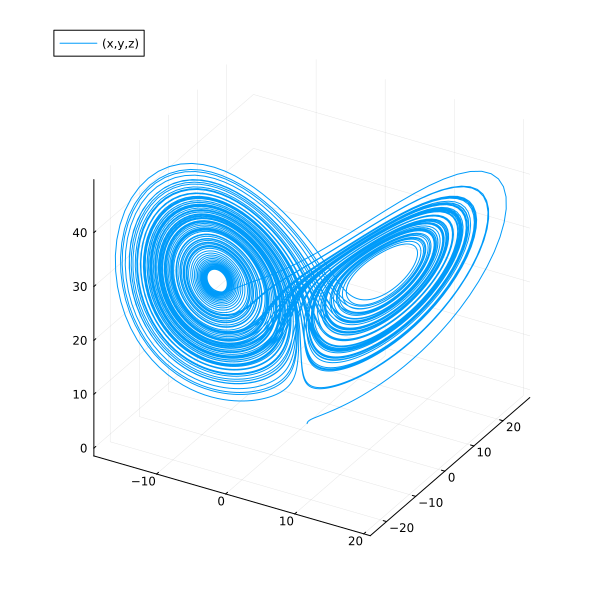

In [15]:
plot(sol, idxs=(x, y, z), size=(600, 600))

## Non-autonomous ODEs

Sometimes a model might have a time-variant external force, which is too complex or impossible to express it symbolically. In such situation, one could apply `@register_symbolic` to it to exclude it from symbolic transformations and use it numerically.

In [16]:
@independent_variables t
@variables x(t) f(t)
@parameters τ
D = Differential(t)

Differential(t)

Define a time-dependent random external force

In [17]:
value_vector = randn(10)
f_fun(t) = t >= 10 ? value_vector[end] : value_vector[Int(floor(t))+1]

f_fun (generic function with 1 method)

"Register" arbitrary Julia functions to be excluded from symbolic transformations. Just use it as-is.

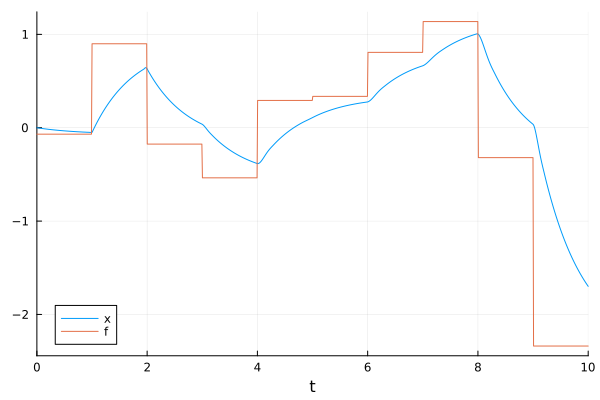

In [18]:
@register_symbolic f_fun(t)
@mtkbuild fol_external_f = ODESystem([f ~ f_fun(t), D(x) ~ (f - x) / τ], t)

prob = ODEProblem(fol_external_f, [x => 0.0], (0.0, 10.0), [τ => 0.75]);
sol = solve(prob)
plot(sol, idxs=[x, f])

## Second-order ODE systems

`ode_order_lowering(sys)` automatically transforms a second-order ODE into two first-order ODEs.

In [19]:
using Plots
using ModelingToolkit
using OrdinaryDiffEq

@parameters σ ρ β
@independent_variables t
@variables x(t) y(t) z(t)
D = Differential(t)

eqs = [
    D(D(x)) ~ σ * (y - x),
    D(y) ~ x * (ρ - z) - y,
    D(z) ~ x * y - β * z
]

@mtkbuild sys = ODESystem(eqs, t)

Model sys:
Equations (4):
  4 standard: see equations(sys)
Unknowns (4): see unknowns(sys)
  xˍt(t)
  y(t)
  z(t)
  x(t)
Parameters (3): see parameters(sys)
  ρ
  β
  σ

Note that you need to provide the initial condition for x's derivative (`D(x)`).

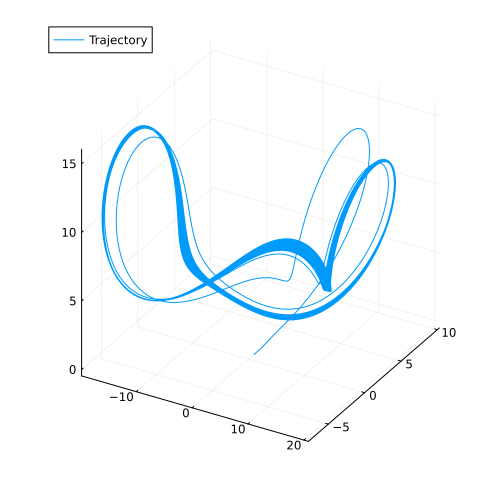

In [20]:
u0 = [
    D(x) => 2.0,
    x => 1.0,
    y => 0.0,
    z => 0.0
]

p = [
    σ => 28.0,
    ρ => 10.0,
    β => 8 / 3
]

tspan = (0.0, 100.0)
prob = ODEProblem(sys, u0, tspan, p, jac=true)
sol = solve(prob)
plot(sol, idxs=(x, y, z), label="Trajectory", size=(500, 500))

## Composing systems

https://docs.sciml.ai/ModelingToolkit/stable/basics/Composition/

By connecting equation(s) to couple ODE systems together, we can build component-based, hierarchical models.

In [21]:
using Plots
using OrdinaryDiffEq
using ModelingToolkit
using ModelingToolkit: t_nounits as t, D_nounits as D

function decay(; name)
    @parameters a
    @variables x(t) f(t)
    ODESystem([
            D(x) ~ -a * x + f
        ], t; name)
end

@named decay1 = decay()
@named decay2 = decay()

Model decay2:
Equations (1):
  1 standard: see equations(decay2)
Unknowns (2): see unknowns(decay2)
  x(t)
  f(t)
Parameters (1): see parameters(decay2)
  a

Define relations (connectors) between the two systems.

In [22]:
connected = compose(
    ODESystem([
            decay2.f ~ decay1.x,
            D(decay1.f) ~ 0], t; name=:connected), decay1, decay2)

equations(connected)

4-element Vector{Symbolics.Equation}:
 Differential(t)(decay1₊f(t)) ~ 0
 decay2₊f(t) ~ decay1₊x(t)
 Differential(t)(decay1₊x(t)) ~ decay1₊f(t) - decay1₊a*decay1₊x(t)
 Differential(t)(decay2₊x(t)) ~ decay2₊f(t) - decay2₊a*decay2₊x(t)

In [23]:
simplified_sys = structural_simplify(connected)
equations(simplified_sys)

3-element Vector{Symbolics.Equation}:
 Differential(t)(decay1₊f(t)) ~ -0.0
 Differential(t)(decay1₊x(t)) ~ decay1₊f(t) - decay1₊a*decay1₊x(t)
 Differential(t)(decay2₊x(t)) ~ decay2₊f(t) - decay2₊a*decay2₊x(t)

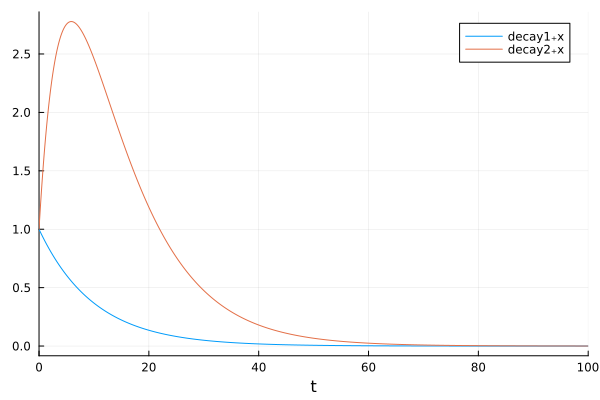

In [24]:
x0 = [decay1.x => 1.0
      decay1.f => 0.0
      decay2.x => 1.0]
p = [decay1.a => 0.1
     decay2.a => 0.2]


tspan = (0.0, 100.0)
sol = solve(ODEProblem(simplified_sys, x0, tspan, p))
plot(sol, idxs=[decay1.x, decay2.x])

### Convert existing functions into MTK systems

`modelingtoolkitize(prob)` generates MKT systems from regular DE problems. I t can also generate analytic Jacobin functions for faster solving.

Example: **[DAE index reduction](https://mtk.sciml.ai/stable/mtkitize_tutorials/modelingtoolkitize_index_reduction/)** for the pendulum problem, which cannot be solved by regular ODE solvers.

In [25]:
using Plots
using ModelingToolkit
using OrdinaryDiffEq
using LinearAlgebra

function pendulum!(du, u, p, t)
    x, dx, y, dy, T = u
    g, L = p
    du[1] = dx
    du[2] = T * x
    du[3] = dy
    du[4] = T * y - g
    # Do not write your function like this after you've learned MTK
    du[5] = x^2 + y^2 - L^2
    return nothing
end

pendulum_fun! = ODEFunction(pendulum!, mass_matrix=Diagonal([1, 1, 1, 1, 0]))
u0 = [1.0, 0.0, 0.0, 0.0, 0.0]
p = [9.8, 1.0]
tspan = (0.0, 10.0)
pendulum_prob = ODEProblem(pendulum_fun!, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: true
timespan: (0.0, 10.0)
u0: 5-element Vector{Float64}:
 1.0
 0.0
 0.0
 0.0
 0.0

Convert the ODE problem into a MTK system.

In [26]:
tracedSys = modelingtoolkitize(pendulum_prob)

Model ##MTKizedODE#434:
Equations (5):
  5 standard: see equations(##MTKizedODE#434)
Unknowns (5): see unknowns(##MTKizedODE#434)
  x₁(t) [defaults to 1.0]
  x₂(t) [defaults to 0.0]
  x₃(t) [defaults to 0.0]
  x₄(t) [defaults to 0.0]
  ⋮
Parameters (2): see parameters(##MTKizedODE#434)
  α₁ [defaults to 9.8]
  α₂ [defaults to 1.0]

`structural_simplify()` and `dae_index_lowering()` transform the index-3 DAE into an index-0 ODE.

In [27]:
pendulumSys = tracedSys |> dae_index_lowering |> structural_simplify

Model ##MTKizedODE#434:
Equations (5):
  5 standard: see equations(##MTKizedODE#434)
Unknowns (5): see unknowns(##MTKizedODE#434)
  x₁(t) [defaults to 1.0]
  x₂(t) [defaults to 0.0]
  x₄(t) [defaults to 0.0]
  x₅(t) [defaults to 0.0]
  ⋮
Parameters (2): see parameters(##MTKizedODE#434)
  α₁ [defaults to 9.8]
  α₂ [defaults to 1.0]

The default `u0` is included in the system already so one can use an empty array `[]` as the initial conditions.

In [28]:
prob = ODEProblem(pendulumSys, [], tspan);
sol = solve(prob, Rodas5P(), abstol=1e-8, reltol=1e-8)

┌ Warning: Initialization system is overdetermined. 2 equations for 0 unknowns. Initialization will default to using least squares. `SCCNonlinearProblem` can only be used for initialization of fully determined systems and hence will not be used here. To suppress this warning pass warn_initialize_determined = false. To make this warning into an error, pass fully_determined = true
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/EpUEk/src/systems/diffeqs/abstractodesystem.jl:1522


retcode: Success
Interpolation: specialized 4rd order "free" stiffness-aware interpolation
t: 5885-element Vector{Float64}:
  0.0
  8.820490580568942e-7
  1.1305014555891484e-6
  1.3789538531214025e-6
  1.6915316787116988e-6
  2.1502965001609697e-6
  2.8783820404427622e-6
  3.896377133997462e-6
  5.347182593843697e-6
  7.050721914091127e-6
  ⋮
  9.974867778864727
  9.978567737582472
  9.981896651586998
  9.985225565591525
  9.988554479596052
  9.99188339360058
  9.995212307605106
  9.998541221609633
 10.0
u: 5885-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0, 0.0, 0.0]
 [1.0, 3.199780977062103e-15, -8.644080768957695e-6, 2.3539169203643222e-8, 2.4095805444881106e-9]
 [1.0, 2.7482280349864486e-15, -1.1078914264773797e-5, -1.8191090934184693e-9, -1.730986481767613e-10]
 [1.0, 3.483841782799009e-15, -1.3513747760589899e-5, 2.67635632067077e-9, 2.9173241828649165e-10]
 [1.0, 4.1771062187710175e-15, -1.657701045137486e-5, 2.164490120014696e-9, 2.489068770938456e-10]
 [1.0, 5.131322600755

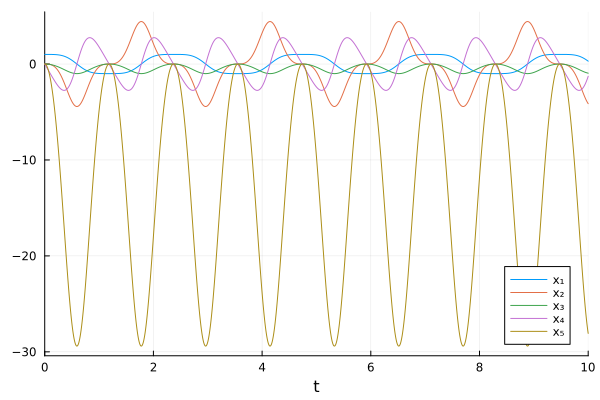

In [29]:
plot(sol, idxs=unknowns(tracedSys))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*